# Argosim tutorial - Part 2

In this tutorial we will explore the `uv_track_multiband` function.

In [ ]:
# Import the uv_track_multiband function from the argosim.antenna_utils module
from argosim.antenna_utils import *

In [8]:
# Display help on the uv_track_multiband function


Which are the inputs and outputs of the function? What are the default values and in which units the inputs are expressed?

...

Group the inputs of the function in the following categories: 
- Related to the physical antenna array:
- Related to the observed source:
- Related to the observation parameters:

What does the function return? How are the outputs related to the inputs?

...

### Array location

Run the cell below and explain what the resulting figure represents.

...


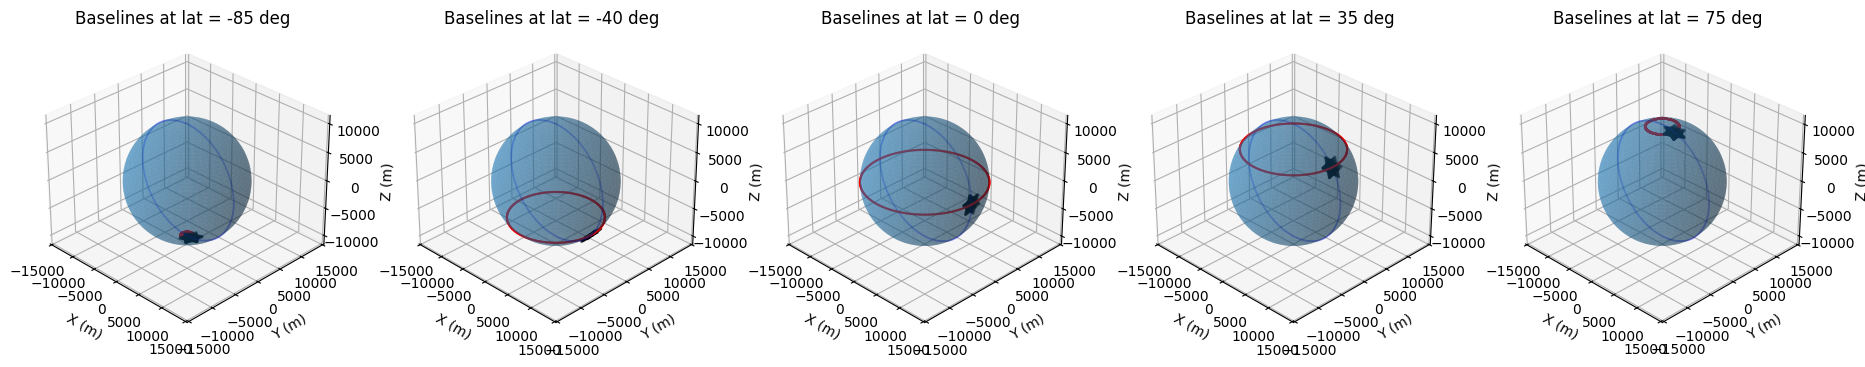

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

array_y = y_antenna_arr(n_antenna=3, r=1000, alpha=13)
array_rand = random_antenna_arr(n_antenna=3, E_lim=250, N_lim=100, U_lim=0)
array_comby = combine_antenna_arr(array_y,array_rand)
b_ENU = get_baselines(array_comby)

fig, ax = plt.subplots(1, 5, figsize=(23, 6), subplot_kw={'projection': '3d'})
l = np.linspace(0, 2 * np.pi, 1000) 
m = np.linspace(0, np.pi, 1000)
R = 10000
x_globe = R * np.outer(np.cos(l), np.sin(m))
y_globe = R * np.outer(np.sin(l), np.sin(m))
z_globe = R * np.outer(np.ones(np.size(l)), np.cos(m))

for i, lat in enumerate([-85, -40, 0, 35, 75]):
    ax[i].plot_surface(x_globe, y_globe, z_globe, alpha=0.4)
    x_shift = R * np.cos(lat/180*np.pi)
    z_shift = R * np.sin(lat/180*np.pi)
    z_circ = np.where((z_globe[0] - z_shift)**2 < 20**2)
    y_circ = np.where((z_globe[0])**2 < 20**2)
    ax[i].scatter(x_globe[:,z_circ], y_globe[:,z_circ], z_globe[:,z_circ], c='r', s=0.3, alpha=0.2)
    ax[i].scatter(x_globe[:,y_circ], z_globe[:,y_circ], y_globe[:,y_circ] , c='b', s=0.1, alpha=0.05)
    X, Y, Z = ENU_to_XYZ(b_ENU, lat = lat/180*np.pi)

    ax[i].scatter(X + x_shift, Y, Z + z_shift, c='k', s=2)
    ax[i].set_xlabel('X (m)')
    ax[i].set_ylabel('Y (m)')
    ax[i].set_zlabel('Z (m)')
    ax[i].set_title('Baselines at lat = {} deg'.format(lat))
    ax[i].axis('equal')
    # Set up view angle
    ax[i].view_init(elev=30, azim=-45)
plt.show()

What do the numbers we iterate over ([-85, -40, 0, 35, 75]) represent?

...


How would this impact the observation?

...

### Source tracking

We will create a radio array and simulate the uv-tracks for different observation strategies.

In [ ]:
# Create a circular array of 22 antennas with a radius of 1000 m 
# and add 6 antennas randomly distributed inside the circle.
...

# Compute the baselines (in ENU coordinates)
...

# Plot the baselines in ENU coordinates. 

In [ ]:
# Define the array latitude as if it was placed in Buenos Aires.
...

# Define the source declination for a source at zenith.
...

# Set up the observation parameters:
# - We will observe the source for 30 minutes.
# - We will start observing when the source is right above the array.
# - The data will be collected every 6 minutes.
# - We observe at 1.5 GHz (single frequency).
...

# Compute the uv-tracks
...

# Plot the uv-tracks
...

In [ ]:
# Now the array will collect data every 2 minute. 
...

# Compute the uv-tracks and plot them
...

In [ ]:
# Now we will observe for 1 hour. Compute the uv-tracks and plot them.
...

In [ ]:
# Get only one snapshot ov the uv-tracks (n_times=1, track_time=0)
...

# Change the starting time and see how the uv-tracks change.
...

Describe how the uv-samples change when observing a source at different times. 

...

How does observing for longer periods will affect the uv-samples? 
...

Would you expect the uv-samples to be more or less dense? 
...

How would this affect the observation?
...

### Multifrequency observation

We will stick to one time sample and observe at multiple 
frequencies.

NOTE: we won't split the uv samples in different bands, hence we will set up the `multi_band` parameter to its default value (`False`).

In [ ]:
# Get only one snapshot of the uv-tracks (n_times=1, track_time=0) with the new starting time.
# Set up the central frequency to 1.5 GHz, a bandwidth of 1 GHz and 3 frequency channels.

# Compute the uv-tracks and plot them.
...

In [ ]:
# Now increase the bandwith to 2 GHz.

# Compute the uv-tracks and plot them.
...

Describe the difference with respect to the previous case.

In [ ]:
# Now add 2 more frequency channels.

# Compute the uv-tracks and plot them.
...

Describe the effect of observing at multiple frequencies, and how this can be used to improve the observation.

### Source tracking and multifrequency observation

We will now combine the two previous cases.

In [ ]:
# Propose an observation strategy where we have multiple time steps and multiple frequency channels.

# Compute the uv-tracks and plot them.
...